In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as col
import textwrap
from met_brewer import palettes
import met_brewer as met

In [2]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_yticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_yticklabels(labels, rotation=0)

In [3]:
df = pd.read_csv('./occ_ech_1444.csv')
df['date'] = pd.to_numeric(df['date'])

In [4]:
ls_auth = df['authority'].unique()

In [5]:
df_out = pd.DataFrame(columns = ['id', 'corporation', 'poele|metier', 'am', 'am_av_1444', 'am_ap_1444', 'cons', 'cons_av_1444',
                                     'cons_ap_1444', 'total'])
for element in ls_auth :
    subdf = df.loc[df['authority'] == element]
    dic = {}
    
    dic['id'] = element
    dic['am_av_1444'] = 0
    dic['am_ap_1444'] = 0
    dic['cons_av_1444'] = 0
    dic['cons_ap_1444'] = 0
    
    for index, row in subdf.iterrows() :
        
        if row['role'] == 'group_50' :
            #df_out['corporation'] = row['represents_in']
            dic['corporation'] = row['represents_in']
            
            if pd.isna(row['represents']) == False :
                #df_out['poele|metier'] = row['represents']
                dic['poele|metier'] = row['represents']
                
                

            
    av1444 = subdf.loc[subdf['date'] <= 1444]
    
    if 'group_48' in av1444['role'].values:
        dic['am_av_1444'] = av1444['role'].value_counts()['group_48']
    
    if 'group_49' in av1444['role'].values:
        dic['cons_av_1444'] = av1444['role'].value_counts()['group_49']

    
    ap1444 = subdf.loc[subdf['date'] > 1444]
    
    if 'group_48' in ap1444['role'].values:
        dic['am_ap_1444'] = ap1444['role'].value_counts()['group_48']
    
    if 'group_49' in ap1444['role'].values:
        dic['cons_ap_1444'] = ap1444['role'].value_counts()['group_49']
    
    dic['am'] = dic['am_av_1444'] + dic['am_ap_1444']
    dic['cons'] = dic['cons_av_1444'] + dic['cons_ap_1444']
    dic['total'] = dic['am'] + dic['cons']
    df_out = df_out.append(dic, ignore_index=True)

In [6]:
df_out['cons'] = df_out['cons'].astype(int)
df_out['am'] = df_out['am'].astype(int)
df_out.to_csv('./RoleCount.csv', index=False)
df_out

,id,corporation,poele|metier,am,am_av_1444,am_ap_1444,cons,cons_av_1444,cons_ap_1444,total
0,aves_aa_4R_auth_0075,group_27,NaN,0,0,0,5,5,0,5
1,aves_aa_4R_auth_0081,group_06,NaN,3,3,0,15,13,2,18
2,aves_aa_4R_auth_0112,group_19,NaN,0,0,0,8,8,0,8
3,aves_aa_4R_auth_0130,group_23,group_45,0,0,0,7,7,0,7
4,aves_aa_4R_auth_0134,group_05,group_44,0,0,0,3,3,0,3
...,...,...,...,...,...,...,...,...,...,...
376,aves_aa_4R_auth_1090,group_12,NaN,0,0,0,0,0,0,0
377,aves_aa_4R_auth_1091,group_12,NaN,0,0,0,0,0,0,0
378,aves_aa_4R_auth_1092,group_12,NaN,0,0,0,0,0,0,0
379,aves_aa_4R_auth_1093,group_30,NaN,0,0,0,0,0,0,0


In [7]:
df_out = df_out.replace(['group_05', 'group_06', 'group_07', 'group_08', 'group_09', 'group_10', 'group_11', 'group_12', 
                'group_13', 'group_14', 'group_15', 'group_16', 'group_17', 'group_18', 'group_19', 'group_20', 
                'group_21', 'group_22', 'group_23', 'group_24', 'group_25', 'group_26', 'group_27', 'group_28', 
                'group_29', 'group_30', 'group_31', 'group_32'],
               ['marchands', 'boulangers', 'bouchers', 
                'tonneliers', 'drapiers', 'tanneurs', 
                'cabaretiers', 'maçons', 'forgerons', 
                'tailleurs', 'bateliers', 'pelletiers', 
                'charpentiers', 'crieurs et mesureurs de vin', 
                'cordonniers', 'orfèvres', 'marchands de grains', 
                'jardiniers', 'pêcheurs', 'barbiers et baigneurs', 
                'sauniers', 'tisserands', 'gourmets et courtiers', 
                'charrons', 'regrattiers, cordiers et fruitiers', 
                'coltineurs de tonneaux', 'constructeurs de bateaux', 
                'huiliers meuniers et tondeurs de draps'])

In [8]:
df_out2 = pd.DataFrame(columns = ['id', 'corporation', 'poele|metier', "mandat d'ammeistre", 'mandat de conseiller', 'époque', 'total'])

for index, row in df_out.iterrows():
    dic = {}
    dic2 = {}
    dic['id'] = row['id']
    dic2['id'] = row['id']
    dic['corporation'] = row['corporation']
    dic2['corporation'] = row['corporation']
    dic['poele|metier'] = row['poele|metier']
    dic2['poele|metier'] = row['poele|metier']
    
    dic["mandat d'ammeistre"] = row['am_av_1444']
    dic['époque'] = "avant 1444"
    dic2["mandat d'ammeistre"] = row['am_ap_1444']
    dic2['époque'] = "après 1444"
    
    dic['mandat de conseiller'] = row['cons_av_1444']
    dic['époque'] = "avant 1444 (1444 inclus)"
    dic2['mandat de conseiller'] = row['cons_ap_1444']
    dic2['époque'] = "après 1444"
    
    dic['total'] = dic["mandat d'ammeistre"] + dic['mandat de conseiller']
    dic2['total'] = dic2["mandat d'ammeistre"] + dic2['mandat de conseiller']
    
    df_out2 = df_out2.append(dic, ignore_index=True)
    df_out2 = df_out2.append(dic2, ignore_index=True)

In [9]:
df_out2['mandat de conseiller'] = df_out2['mandat de conseiller'].astype(int)
df_out2["mandat d'ammeistre"] = df_out2["mandat d'ammeistre"].astype(int)
df_out2

,id,corporation,poele|metier,mandat d'ammeistre,mandat de conseiller,époque,total
0,aves_aa_4R_auth_0075,gourmets et courtiers,NaN,0,5,avant 1444 (1444 inclus),5
1,aves_aa_4R_auth_0075,gourmets et courtiers,NaN,0,0,après 1444,0
2,aves_aa_4R_auth_0081,boulangers,NaN,3,13,avant 1444 (1444 inclus),16
3,aves_aa_4R_auth_0081,boulangers,NaN,0,2,après 1444,2
4,aves_aa_4R_auth_0112,cordonniers,NaN,0,8,avant 1444 (1444 inclus),8
...,...,...,...,...,...,...,...
757,aves_aa_4R_auth_1092,maçons,NaN,0,0,après 1444,0
758,aves_aa_4R_auth_1093,coltineurs de tonneaux,NaN,0,0,avant 1444 (1444 inclus),0
759,aves_aa_4R_auth_1093,coltineurs de tonneaux,NaN,0,0,après 1444,0
760,aves_aa_4R_auth_1094,bateliers,group_39,0,0,avant 1444 (1444 inclus),0


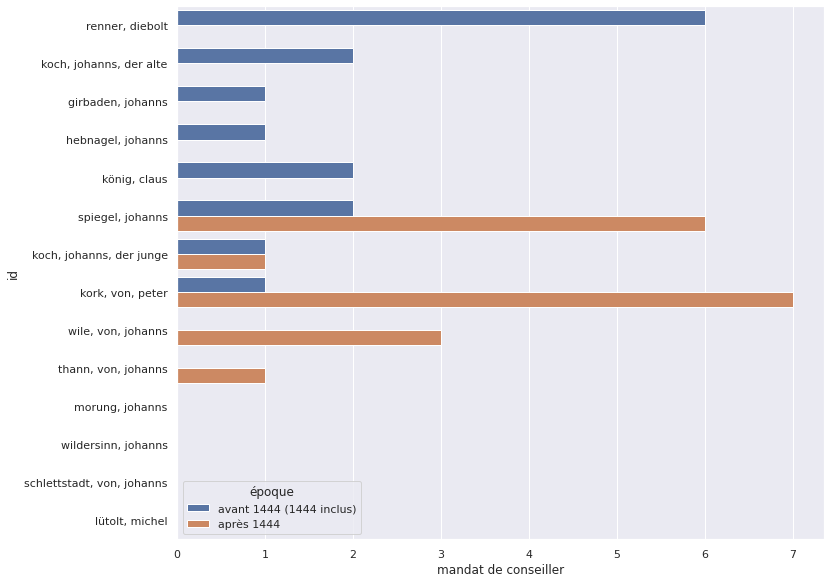

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

df_histo = df_out2.loc[df_out2['corporation'] == 'tisserands']

df_histo = df_histo.replace(['aves_aa_4R_auth_0494', 'aves_aa_4R_auth_0505', 'aves_aa_4R_auth_0179', 
                  'aves_aa_4R_auth_0422', 'aves_aa_4R_auth_0934', 'aves_aa_4R_auth_0448', 
                  'aves_aa_4R_auth_1076', 'aves_aa_4R_auth_0566', 'aves_aa_4R_auth_1077', 
                  'aves_aa_4R_auth_0462', 'aves_aa_4R_auth_0587', 'aves_aa_4R_auth_0531', 
                  'aves_aa_4R_auth_1095', 'aves_aa_4R_auth_1078'], 
                 ['könig, claus', 'spiegel, johanns', 'renner, diebolt', 'koch, johanns, der alte', 
                 'koch, johanns, der junge', 'girbaden, johanns', 'morung, johanns', 'wile, von, johanns', 
                 'wildersinn, johanns', 'hebnagel, johanns', 'thann, von, johanns', 'kork, von, peter', 
                 'schlettstadt, von, johanns', 'lütolt, michel'])

fig = sns.barplot(x="mandat de conseiller", y="id", hue="époque", data= df_histo)
fig = fig.get_figure()
fig.tight_layout()
fig.savefig('./Images/barplot_tisserands_cons.svg', format='svg')

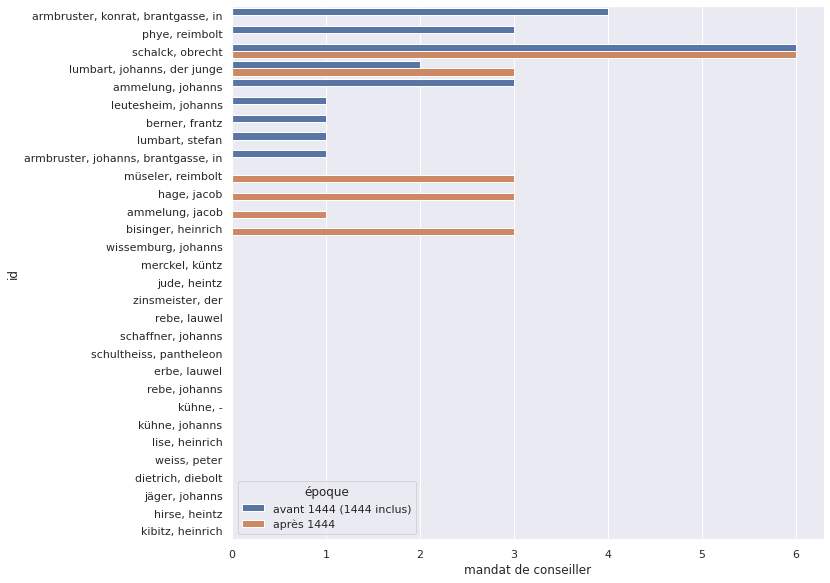

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

df_histo = df_out2.loc[df_out2['corporation'] == 'bateliers']

df_histo = df_histo.replace(['aves_aa_4R_auth_0352', 'aves_aa_4R_auth_0173', 'aves_aa_4R_auth_0365', 
                             'aves_aa_4R_auth_0341', 'aves_aa_4R_auth_0360', 'aves_aa_4R_auth_0547', 
                             'aves_aa_4R_auth_0556', 'aves_aa_4R_auth_0715', 'aves_aa_4R_auth_0935', 
                             'aves_aa_4R_auth_0439', 'aves_aa_4R_auth_0613', 'aves_aa_4R_auth_0936', 
                             'aves_aa_4R_auth_0501', 'aves_aa_4R_auth_0937', 'aves_aa_4R_auth_0667', 
                             'aves_aa_4R_auth_0938', 'aves_aa_4R_auth_0939', 'aves_aa_4R_auth_0940', 
                             'aves_aa_4R_auth_0941', 'aves_aa_4R_auth_0942', 'aves_aa_4R_auth_0943', 
                             'aves_aa_4R_auth_0944', 'aves_aa_4R_auth_0945', 'aves_aa_4R_auth_0946', 
                             'aves_aa_4R_auth_0947', 'aves_aa_4R_auth_0948', 'aves_aa_4R_auth_0949', 
                             'aves_aa_4R_auth_0950', 'aves_aa_4R_auth_0583', 'aves_aa_4R_auth_1094'],
                            ['schalck, obrecht', 'armbruster, konrat, brantgasse, in', 'ammelung, johanns', 
                             'phye, reimbolt', 'lumbart, johanns, der junge', 'lumbart, stefan', 
                             'armbruster, johanns, brantgasse, in', 'bisinger, heinrich', 'wissemburg, johanns', 
                             'leutesheim, johanns', 'hage, jacob', 'merckel, küntz', 'berner, frantz', 
                             'jude, heintz', 'ammelung, jacob', 'zinsmeister, der', 'rebe, lauwel', 
                             'schaffner, johanns', 'schultheiss, pantheleon', 'erbe, lauwel', 'rebe, johanns', 
                             'kühne, -', 'kühne, johanns', 'lise, heinrich', 'weiss, peter', 'dietrich, diebolt', 
                             'jäger, johanns', 'hirse, heintz', 'müseler, reimbolt', 'kibitz, heinrich'])

fig = sns.barplot(x="mandat de conseiller", y="id", hue="époque", data= df_histo)
fig = fig.get_figure()
fig.tight_layout()
fig.savefig('./Images/barplot_bateliers_cons.svg', format='svg')

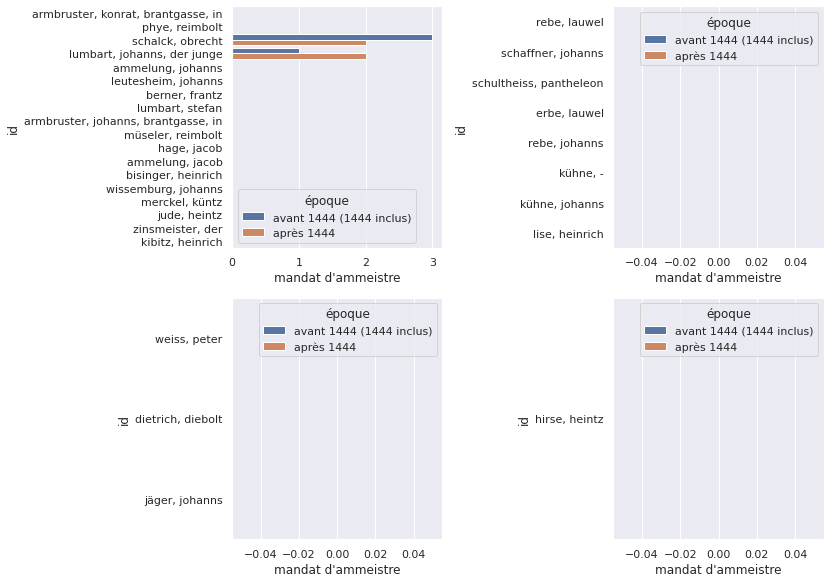

In [12]:
df_histo = df_out2.loc[df_out2['corporation'] == 'bateliers']

df_histo = df_histo.replace(['aves_aa_4R_auth_0352', 'aves_aa_4R_auth_0173', 'aves_aa_4R_auth_0365', 
                             'aves_aa_4R_auth_0341', 'aves_aa_4R_auth_0360', 'aves_aa_4R_auth_0547', 
                             'aves_aa_4R_auth_0556', 'aves_aa_4R_auth_0715', 'aves_aa_4R_auth_0935', 
                             'aves_aa_4R_auth_0439', 'aves_aa_4R_auth_0613', 'aves_aa_4R_auth_0936', 
                             'aves_aa_4R_auth_0501', 'aves_aa_4R_auth_0937', 'aves_aa_4R_auth_0667', 
                             'aves_aa_4R_auth_0938', 'aves_aa_4R_auth_0939', 'aves_aa_4R_auth_0940', 
                             'aves_aa_4R_auth_0941', 'aves_aa_4R_auth_0942', 'aves_aa_4R_auth_0943', 
                             'aves_aa_4R_auth_0944', 'aves_aa_4R_auth_0945', 'aves_aa_4R_auth_0946', 
                             'aves_aa_4R_auth_0947', 'aves_aa_4R_auth_0948', 'aves_aa_4R_auth_0949', 
                             'aves_aa_4R_auth_0950', 'aves_aa_4R_auth_0583', 'aves_aa_4R_auth_1094'],
                            ['schalck, obrecht', 'armbruster, konrat, brantgasse, in', 'ammelung, johanns', 
                             'phye, reimbolt', 'lumbart, johanns, der junge', 'lumbart, stefan', 
                             'armbruster, johanns, brantgasse, in', 'bisinger, heinrich', 'wissemburg, johanns', 
                             'leutesheim, johanns', 'hage, jacob', 'merckel, küntz', 'berner, frantz', 
                             'jude, heintz', 'ammelung, jacob', 'zinsmeister, der', 'rebe, lauwel', 
                             'schaffner, johanns', 'schultheiss, pantheleon', 'erbe, lauwel', 'rebe, johanns', 
                             'kühne, -', 'kühne, johanns', 'lise, heinrich', 'weiss, peter', 'dietrich, diebolt', 
                             'jäger, johanns', 'hirse, heintz', 'müseler, reimbolt', 'kibitz, heinrich'])

df_histo = df_histo.replace(['group_39', 'group_41', 'group_42', 'group_43'],
                            ['poele zum Anker', 'poele zum Hirtzhorn', 'poele zum Holtzapfel', 'poele zum Schiff'])

ls = ['poele zum Anker', 'poele zum Hirtzhorn', 'poele zum Holtzapfel', 'poele zum Schiff']


fig, axs = plt.subplots(2, 2)

df = df_histo.loc[df_histo['poele|metier'] == 'poele zum Anker']

sns.barplot(x="mandat d'ammeistre", y="id", hue="époque", data= df, ax = axs[0, 0])

df = df_histo.loc[df_histo['poele|metier'] == 'poele zum Schiff']

sns.barplot(x="mandat d'ammeistre", y="id", hue="époque", data= df, ax = axs[0, 1])

df = df_histo.loc[df_histo['poele|metier'] == 'poele zum Hirtzhorn']

sns.barplot(x="mandat d'ammeistre", y="id", hue="époque", data= df, ax = axs[1, 0])

df = df_histo.loc[df_histo['poele|metier'] == 'poele zum Holtzapfel']

sns.barplot(x="mandat d'ammeistre", y="id", hue="époque", data= df, ax = axs[1, 1])

fig.tight_layout()
fig.savefig('./Images/barplot_bateliers_am.svg', format='svg')

In [13]:
my_order = df_out2.groupby(by=["corporation"])["mandat de conseiller"].sum().sort_values(ascending=False).index
ls_ylabels = my_order.to_list()

In [14]:
colors = palettes.met_brew(name="Hokusai1", n=20, brew_type="continuous")
my_order = df_out2.groupby(by= ['corporation'])['id'].nunique().sort_values(ascending=False).index

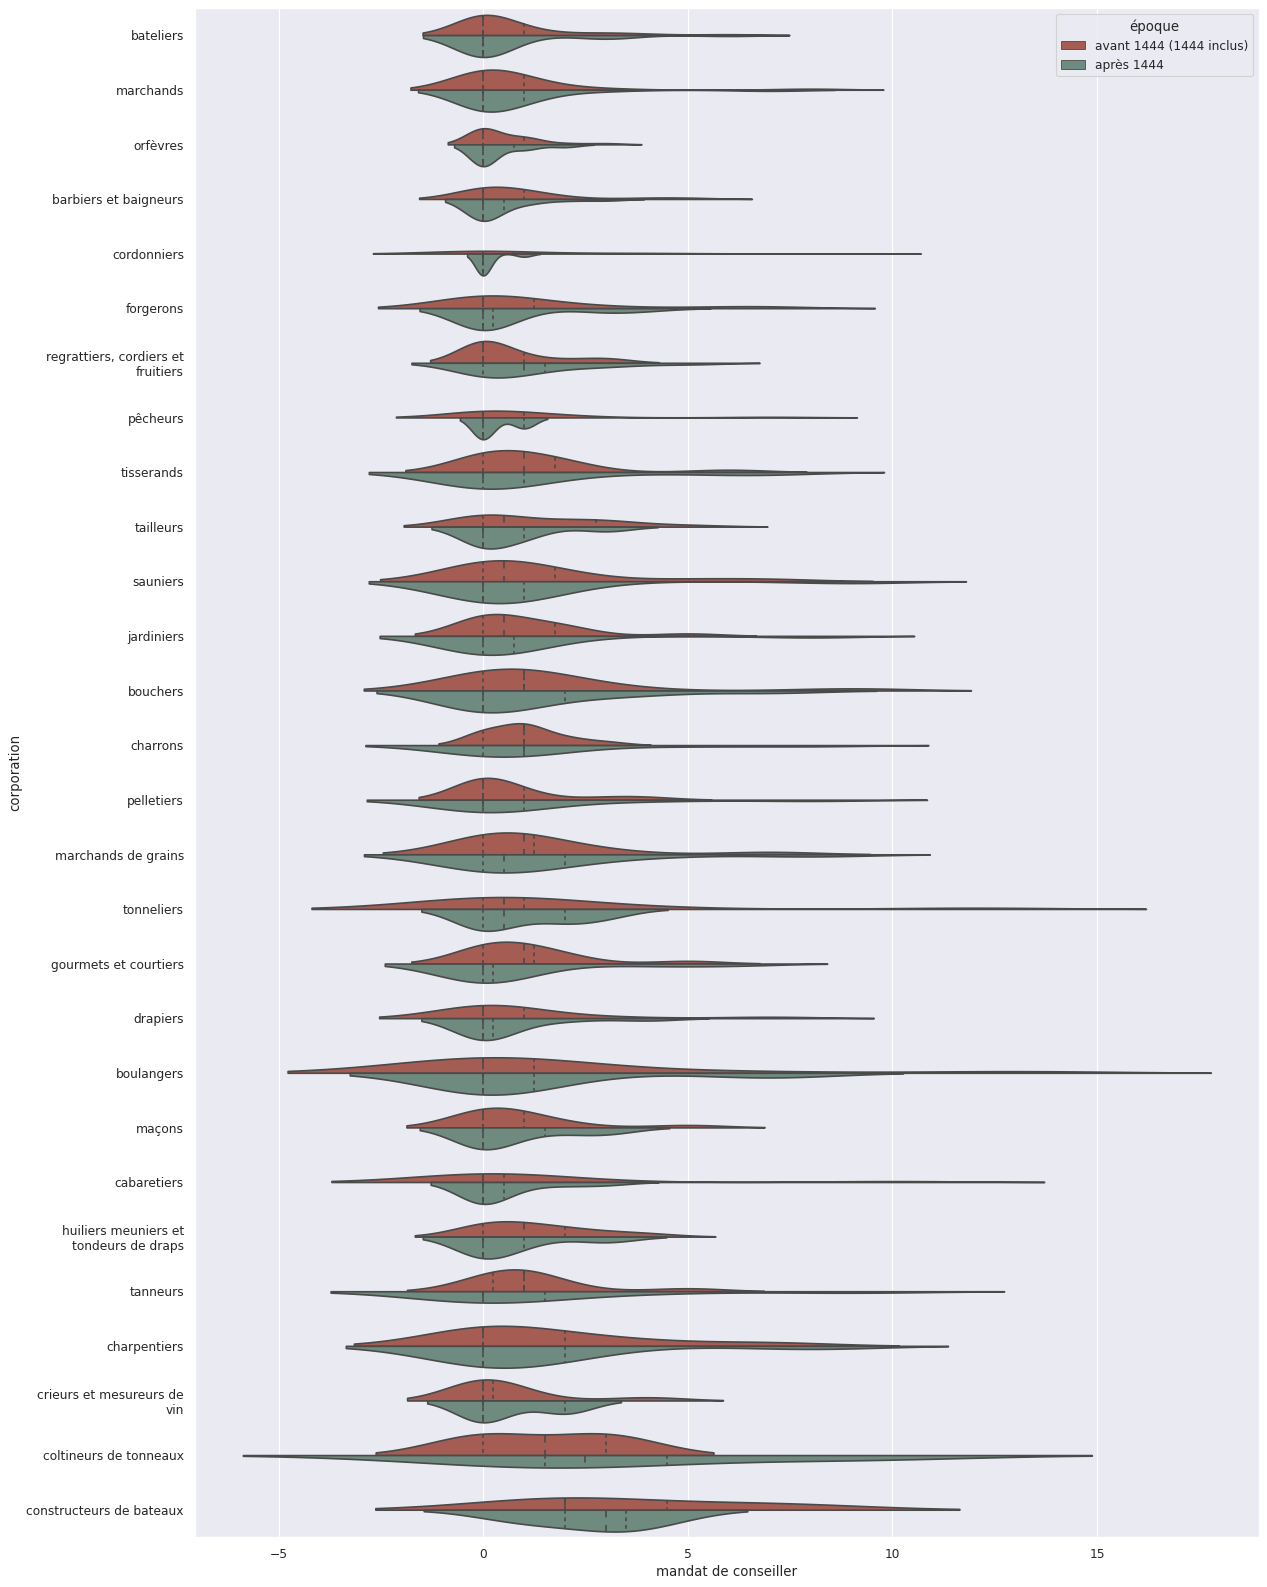

In [15]:
plt.figure(figsize=(16, 20), dpi=80)
violinplot_cons = sns.violinplot(y="corporation", x="mandat de conseiller", hue="époque", data=df_out2, 
                                 inner='quartile', order = my_order, palette= [colors[3], colors[-3]], split=True)
wrap_labels(violinplot_cons, 25)
#violinplot_cons.set_title('Diagrammes violons du nombre de mandats de conseiller des échevins de 1444 par corporation', loc='center')
fig = violinplot_cons.get_figure()
fig.tight_layout()
fig.savefig('./Images/violinplot_cons.svg', format='svg')

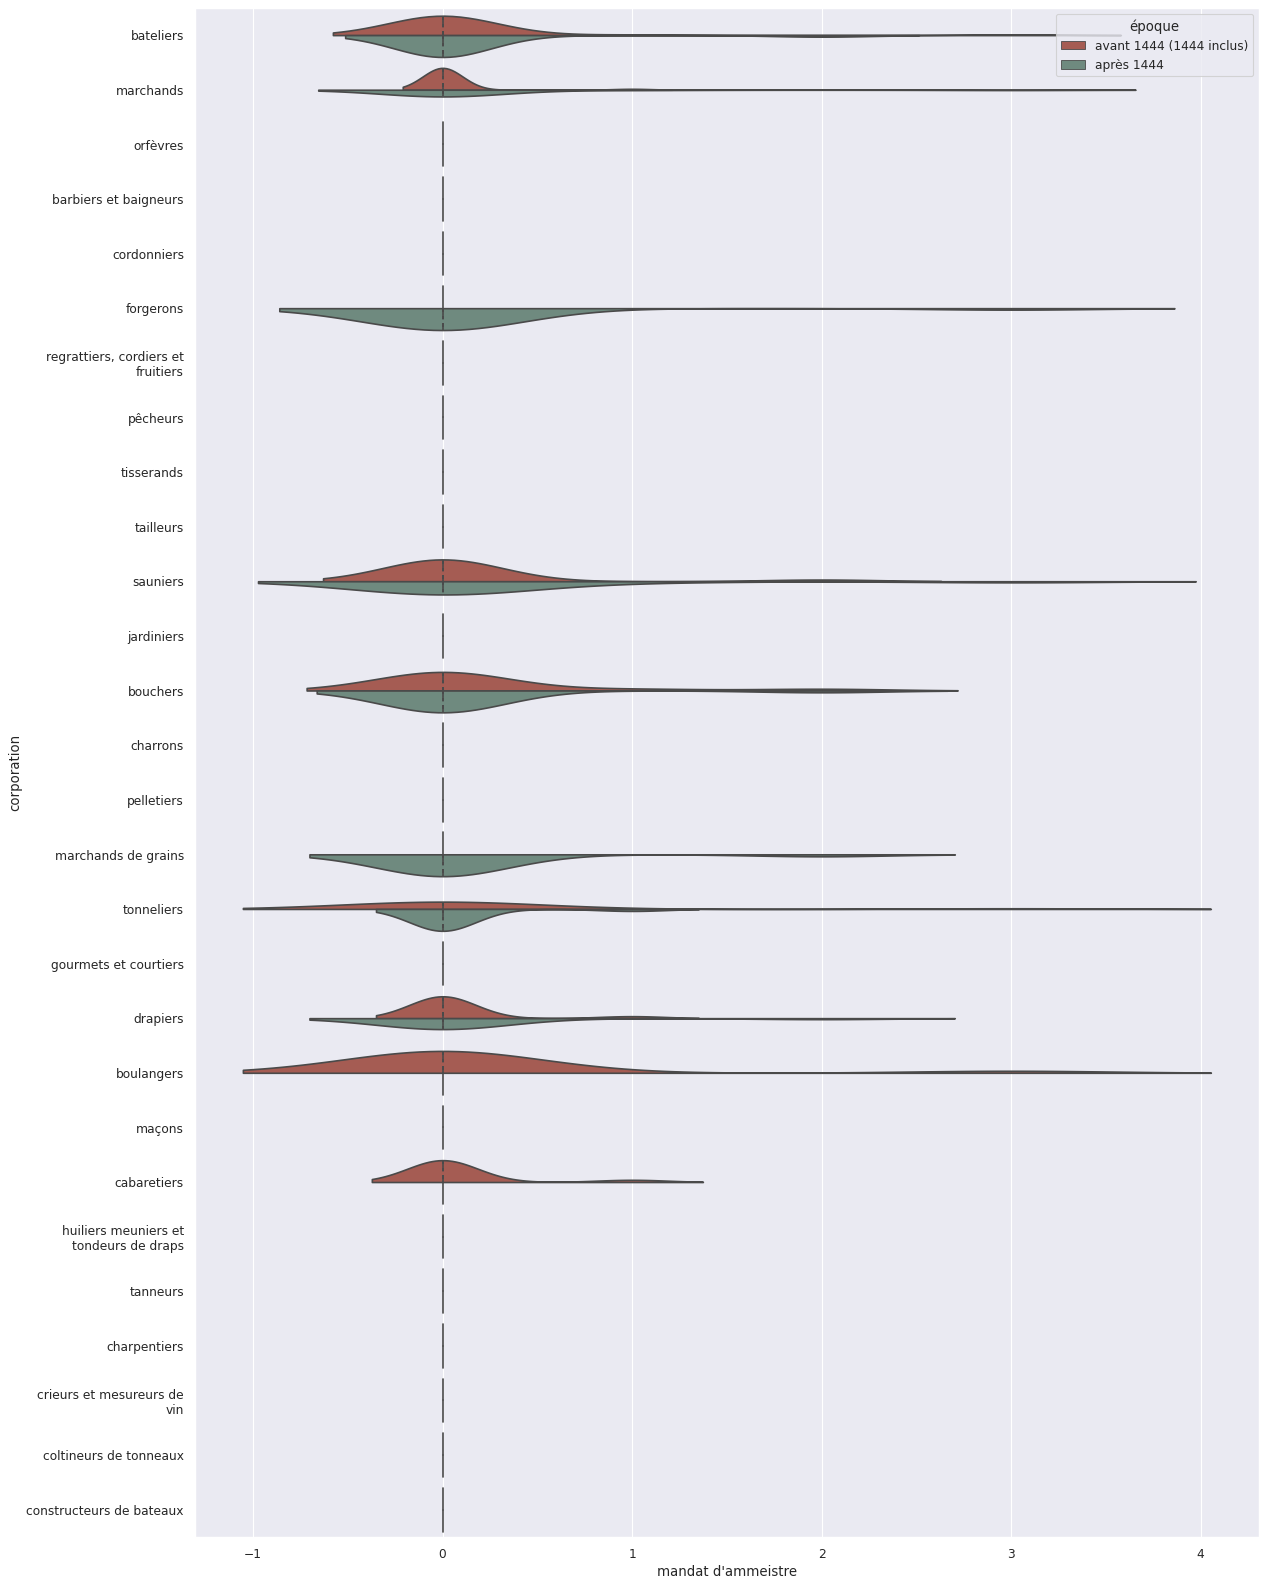

In [16]:
plt.figure(figsize=(16, 20), dpi=80)
violinplot_am = sns.violinplot(y="corporation", x="mandat d'ammeistre", hue="époque", data=df_out2, 
                                 inner='quartile', order = my_order, palette=[colors[3], colors[-3]], split=True)
wrap_labels(violinplot_am, 25)
#violinplot_am.set_title("Diagrammes violons du nombre de mandats d'ammeistre des échevins de 1444 par corporation", loc='center')
fig = violinplot_am.get_figure()
fig.tight_layout()
fig.savefig('./Images/violinplot_am.svg', format='svg')

In [17]:
ls_ylabels2 = ["bateliers", "orfèvres", "barbiers et baigneurs", "regrattiers, cordiers et fruitiers", "pêcheurs", "jardiniers", 
               "huiliers meuniers et tondeurs de draps", "crieurs et mesureurs de vin"]

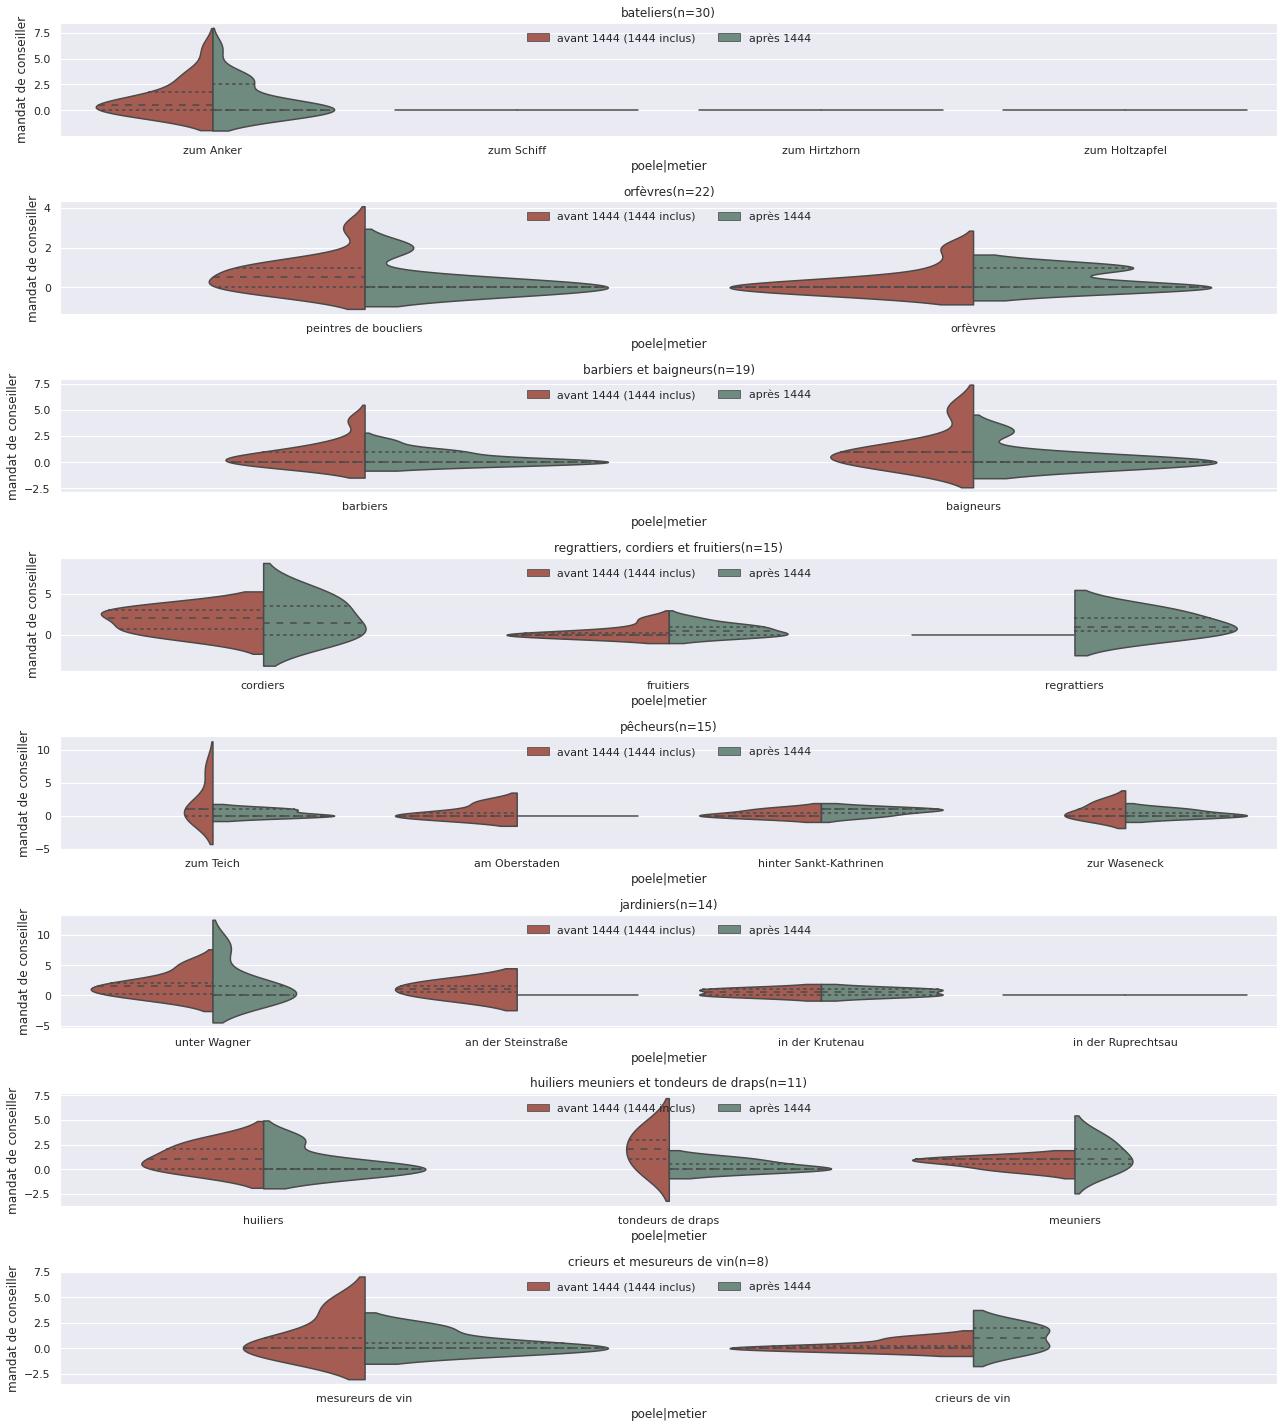

In [18]:
df_out2 = df_out2.replace(['group_39', 'group_43', 'group_41', 'group_42', 'group_44', 'group_46', 
                         'group_40', 'group_71', 'group_72', 'group_69', 'group_66', 'group_64',
                         'group_63', 'group_68', 'group_74', 'group_70', 'group_33', 'group_35',
                         'group_45', 'group_47', 'group_38', 'group_34', 'group_36', 'group_37',
                         'group_65', 'group_67', 'group_73', 'group_55'],
               ['zum Anker', 'zum Schiff', 'zum Hirtzhorn', 'zum Holtzapfel', 'zum Spiegel', 'zur Blume',
                'zum Friburger', 'orfèvres', 'peintres de boucliers', 'mesureurs de vin', 'crieurs de vin', 'barbiers',
                'baigneurs', 'huiliers', 'tondeurs de draps', 'meuniers', 'am Oberstaden', 'hinter Sankt-Kathrinen',
                'zum Teich', 'zur Waseneck', 'unter Wagner', 'an der Steinstraße', 'in der Krutenau', 'in der Ruprechtsau',
                'cordiers', 'fruitiers', 'regrattiers', 'carreleurs'])

fig, axes = plt.subplots(8, figsize=(18, 20))

axx = 0
for element in ls_ylabels2 :
    df = df_out2[df_out2['corporation'] == element]
    if df['poele|metier'].nunique() > 1 : 
        violin_plot = sns.violinplot(ax = axes[axx], x='poele|metier', y = 'mandat de conseiller', hue = 'époque',
               data = df, inner='quartile', palette=[colors[3], colors[-3]], split=True)
        axes[axx].title.set_text(element + "(n=" + str(df['id'].nunique()) + ")" )
        sns.move_legend(violin_plot, "upper center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False,)
        axx = axx + 1

#fig.get_axes()[0].annotate('Diagrammes violons de la répartition des mandats de conseiller parmis les échevins de 1444', (0.5, 0.95), 
                            #xycoords='figure fraction', ha='center', 
                            #fontsize=24)

fig.tight_layout()
fig.savefig('./Images/violinplot_poelemetier_cons.svg', format='svg')

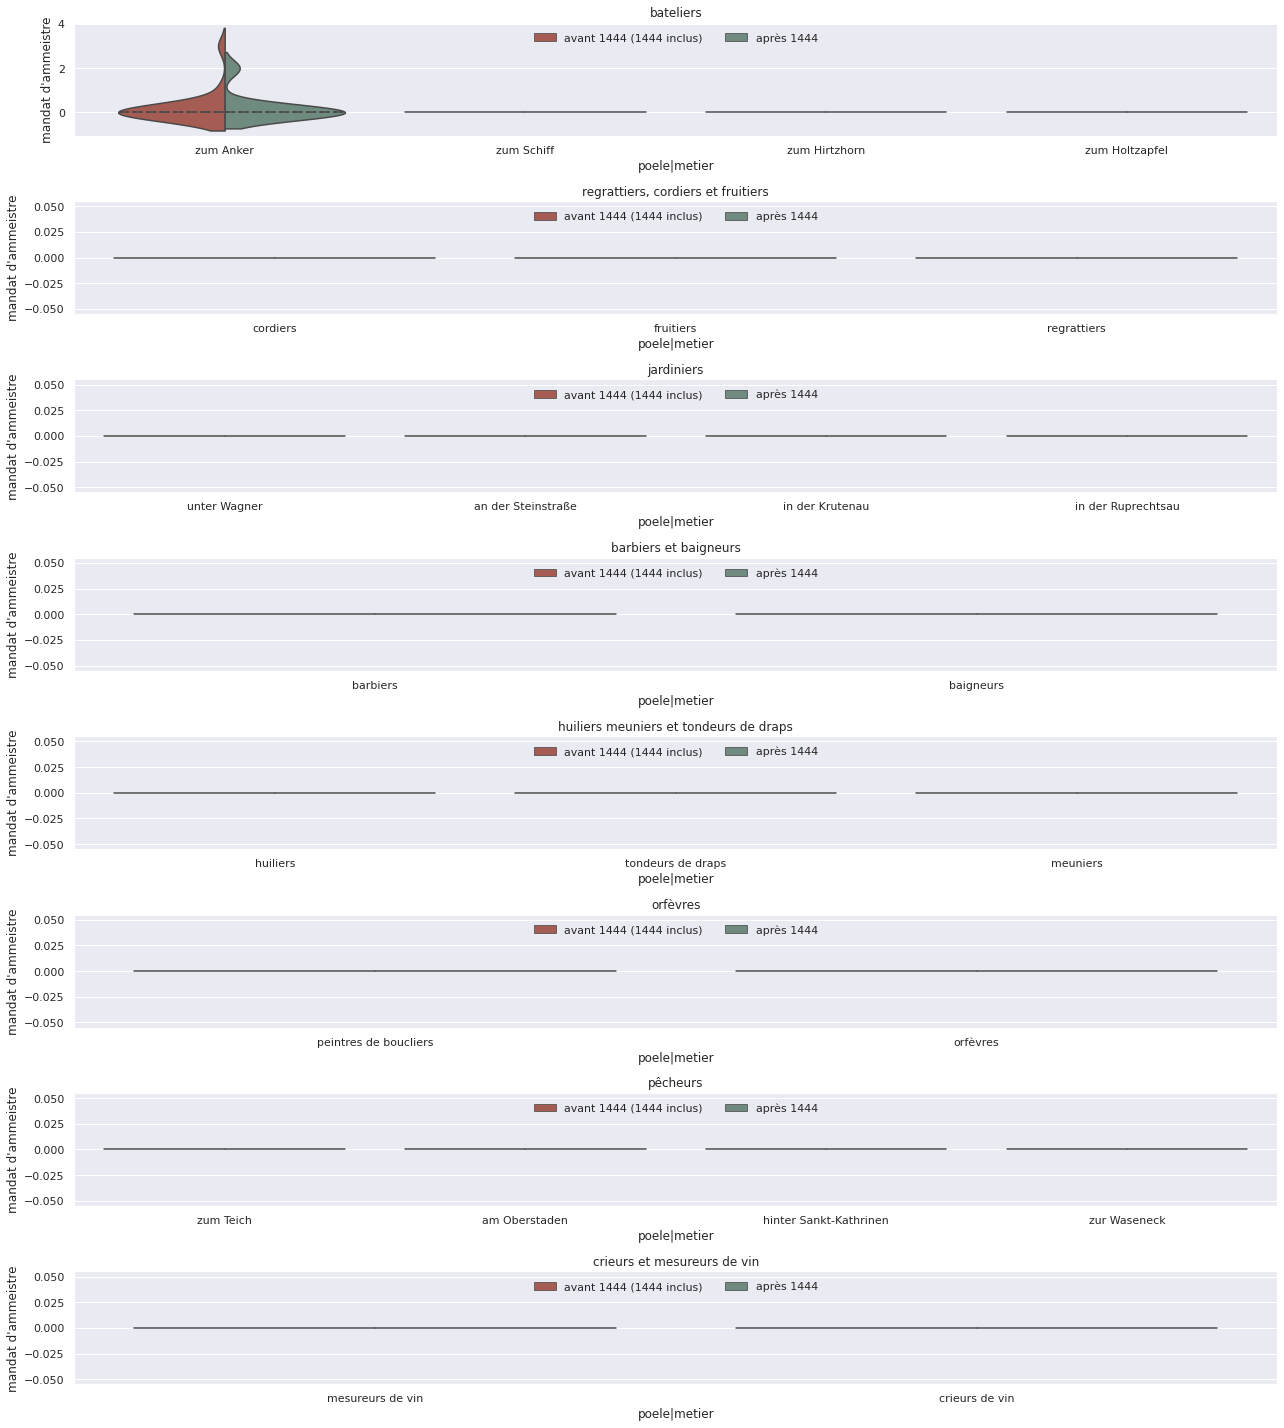

In [19]:
fig, axes = plt.subplots(8, figsize=(18, 20))

axx = 0
for element in ls_ylabels :
    df = df_out2[df_out2['corporation'] == element]
    if df['poele|metier'].nunique() > 1 : 
        violin_plot = sns.violinplot(ax = axes[axx], x='poele|metier', y = "mandat d'ammeistre", hue = 'époque',
               data = df, inner='quartile', palette=[colors[3], colors[-3]], split=True)
        axes[axx].title.set_text(element)
        sns.move_legend(violin_plot, "upper center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False,)
        axx = axx + 1
        
#fig.get_axes()[0].annotate("Diagrammes violons de la répartition des mandats d'ammeistre parmis les échevins de 1444", (0.5, 0.95), 
                            #xycoords='figure fraction', ha='center', 
                            #fontsize=24)

fig.tight_layout()
fig.savefig('./Images/violinplot_poelemetier_am.svg', format='svg')

Text(23.125, 0.5, 'mandats de conseiller avant 1444')

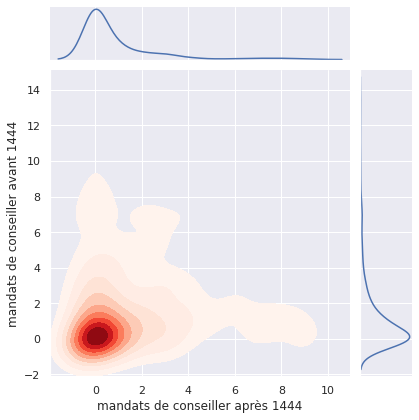

In [20]:
joinplot_cons = sns.jointplot(x=df_out.cons_ap_1444, y=df_out.cons_av_1444, cmap="Reds", shade=True, kind='kde')
joinplot_cons.ax_joint.set_xlabel("mandats de conseiller après 1444")
joinplot_cons.ax_joint.set_ylabel("mandats de conseiller avant 1444")

Text(23.125, 0.5, "mandats d'ammeistre avant 1444")

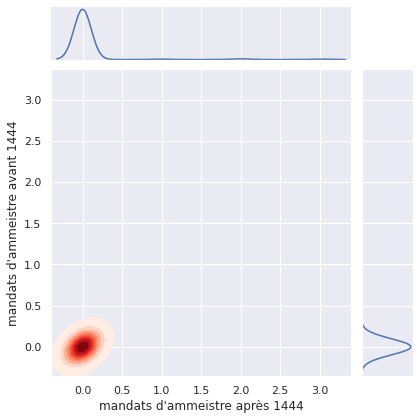

In [21]:
joinplot_am = sns.jointplot(x=df_out.am_ap_1444, y=df_out.am_av_1444, cmap="Reds", shade=True, kind='kde')
joinplot_am.ax_joint.set_xlabel("mandats d'ammeistre après 1444")
joinplot_am.ax_joint.set_ylabel("mandats d'ammeistre avant 1444")

/tmp/ipykernel_76871/2676901605.py:1: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot( 'cons_ap_1444', 'cons_av_1444', "", data=df_out, linestyle='', marker='o', markersize=0.7)
/tmp/ipykernel_76871/2676901605.py:2: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot( 'am_ap_1444', 'am_av_1444', "", data=df_out, linestyle='', marker='o', markersize=0.7)


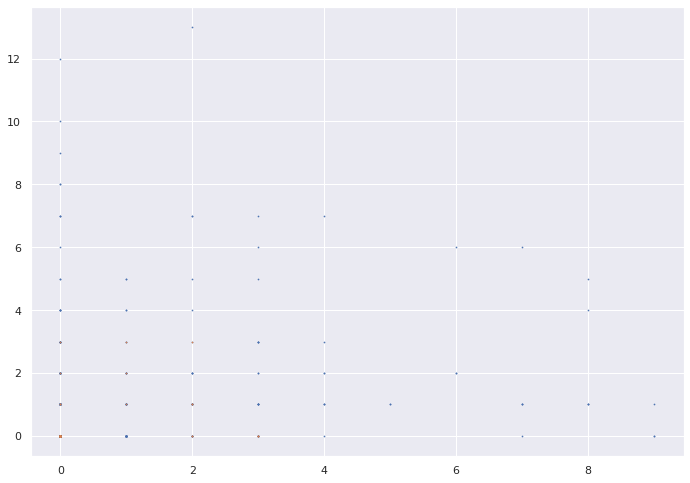

In [22]:
plt.plot( 'cons_ap_1444', 'cons_av_1444', "", data=df_out, linestyle='', marker='o', markersize=0.7)
plt.plot( 'am_ap_1444', 'am_av_1444', "", data=df_out, linestyle='', marker='o', markersize=0.7)